In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [ ]:
# Cargar el dataset del Titanic (puedes cambiar la ruta si tienes el archivo localmente)
vid = 'data/KRvideos_cc50_202101.csv'
df = pd.read_csv(vid)

# Visualizar las primeras filas
print(df.head())

      video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                      Capítulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2             LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

              channel_title  category_id      publish_time  \
0           MasterChef 2017         24.0   13/11/2017 1:06   
1  Micky Contreras Martinez         22.0   13/11/2017 0:11   
2  El Pulso De La República         25.0  13/11/2017 12:00   
3                  Casanare         25.0  12/11/2017 22:47   
4                     Musas         26.0  13/11/2017 14:17   

                                                tags     views    likes  \
0  MasterChef Junior 2

In [ ]:
# Información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44043 entries, 0 to 44042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                43959 non-null  object 
 1   trending_date           40593 non-null  object 
 2   title                   40510 non-null  object 
 3   channel_title           40501 non-null  object 
 4   category_id             40451 non-null  float64
 5   publish_time            40451 non-null  object 
 6   tags                    40480 non-null  object 
 7   views                   40451 non-null  float64
 8   likes                   40451 non-null  float64
 9   dislikes                40451 non-null  float64
 10  comment_count           40451 non-null  float64
 11  thumbnail_link          40471 non-null  object 
 12  comments_disabled       40451 non-null  object 
 13  ratings_disabled        40451 non-null  object 
 14  video_error_or_removed  40451 non-null

##CANTIDAD DE DATOS

In [ ]:
len(df)

44043

##VERIFICAR VALORES NULOS POR COLUMNA

In [ ]:
# Verificar valores nulos por columna
missing_values = df.isnull().sum()
print(missing_values)

# Porcentaje de valores nulos
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

video_id                    84
trending_date             3450
title                     3533
channel_title             3542
category_id               3592
publish_time              3592
tags                      3563
views                     3592
likes                     3592
dislikes                  3592
comment_count             3592
thumbnail_link            3572
comments_disabled         3592
ratings_disabled          3592
video_error_or_removed    3592
description               7797
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64
video_id                   0.190723
trending_date              7.833254
title                      8.021706
channel_title              8.042141
category_id                8.155666
publish_time               8.155666
tags                       8.089821
views                      8.155666
likes                      8.155666
dislikes                   8.155666
comment

##TRATAMIENTO DE VALORES DUPLICADOS

In [ ]:
# Verificar si hay duplicados
duplicates = df.duplicated().sum()
print(f'Duplicados: {duplicates}')

# Eliminar duplicados si es necesario
#df = df.drop_duplicates()

Duplicados: 1317


##TRATAMIENTO DE VALORES NULOS

In [ ]:
# Para imputar con la mediana
df['views'] = df['views'].fillna(df['views'].median())
df['likes'] = df['likes'].fillna(df['likes'].median())
df['dislikes'] = df['dislikes'].fillna(df['dislikes'].median())
df['comment_count'] = df['comment_count'].fillna(df['comment_count'].median())

# Para imputar con la moda
df['video_id'] = df['video_id'].fillna(df['video_id'].mode()[0])
df['trending_date'] = df['trending_date'].fillna(df['trending_date'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])
df['channel_title'] = df['channel_title'].fillna(df['channel_title'].mode()[0])
df['category_id'] = df['category_id'].fillna(df['category_id'].mode()[0])
df['publish_time'] = df['publish_time'].fillna(df['publish_time'].mode()[0])
df['tags'] = df['tags'].fillna(df['tags'].mode()[0])
df['thumbnail_link'] = df['thumbnail_link'].fillna(df['thumbnail_link'].mode()[0])
df['comments_disabled'] = df['comments_disabled'].fillna(df['comments_disabled'].mode()[0])
df['ratings_disabled'] = df['ratings_disabled'].fillna(df['ratings_disabled'].mode()[0])
df['video_error_or_removed'] = df['video_error_or_removed'].fillna(df['video_error_or_removed'].mode()[0])
df['description'] = df['description'].fillna(df['description'].mode()[0])

# Eliminar la columna 'Cabin' por tener demasiados valores nulos
#df.drop('Cabin', axis=1, inplace=True)

# Verificar nuevamente los valores nulos
print(df.isnull().sum())

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
dtype: int64


In [ ]:
len(df)

44043

##VERIFICANDO VALORES ATIPICOS

In [ ]:
class OutlierHandler:
    def __init__(self, df):
        self.df = df

    def _calculate_iqr_bounds(self, column):
        Q1 = self.df[column].quantile(0.25)
        Q3 = self.df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return lower_bound, upper_bound

    def find_outliers_iqr(self, column):
        lower_bound, upper_bound = self._calculate_iqr_bounds(column)
        outliers = self.df[(self.df[column] < lower_bound) | (self.df[column] > upper_bound)]
        return outliers

    def count_outliers_iqr(self, column):
        lower_bound, upper_bound = self._calculate_iqr_bounds(column)
        outliers = self.df[(self.df[column] < lower_bound) | (self.df[column] > upper_bound)]
        outliers_count = outliers.shape[0]
        total_count = self.df.shape[0]
        percentage_outliers = (outliers_count / total_count) * 100
        return outliers_count, percentage_outliers

    def replace_outliers_iqr(self, column):
        lower_bound, upper_bound = self._calculate_iqr_bounds(column)
        median = self.df[column].median()
        # Aplicar reemplazo de valores atípicos por la mediana
        self.df[column] = self.df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
        return self.df


In [ ]:
outlier_handler = OutlierHandler(df)

In [ ]:
# Aplicar el método a las columnas relevantes para encontrar valores atípicos
outliers_views = outlier_handler.find_outliers_iqr('views')
outliers_likes = outlier_handler.find_outliers_iqr('likes')
outliers_dislikes = outlier_handler.find_outliers_iqr('dislikes')
outliers_comment_count = outlier_handler.find_outliers_iqr('comment_count')

# Imprimir resultados
print("Outliers in 'views':")
print(outliers_views)

print("\nOutliers in 'likes':")
print(outliers_likes)

print("\nOutliers in 'dislikes':")
print(outliers_dislikes)

print("\nOutliers in 'comment_count':")
print(outliers_comment_count)

##CANTIDAD DE ATIPICOS

In [ ]:
# Aplicar el método a las columnas relevantes y sumar los resultados
columns = ['views', 'likes', 'dislikes', 'comment_count']
total_outliers = 0
total_percentage = 0

for column in columns:
    outliers_count, percentage_outliers = outlier_handler.count_outliers_iqr(column)  # Uso del método de la clase
    total_outliers += outliers_count
    total_percentage += percentage_outliers
    print(f"Columna: {column} - Valores atípicos: {outliers_count} ({percentage_outliers:.2f}%)")

# Mostrar los resultados totales
print(f"\nValores atípicos totales: {total_outliers}")
print(f"Porcentaje total de valores atípicos: {total_percentage / len(columns):.2f}%")

Columna: views - Valores atípicos: 5209 (11.83%)
Columna: likes - Valores atípicos: 5783 (13.13%)
Columna: dislikes - Valores atípicos: 5618 (12.76%)
Columna: comment_count - Valores atípicos: 5447 (12.37%)

Valores atípicos totales: 22057
Porcentaje total de valores atípicos: 12.52%


##TRATAMIENTO DE VALORES ATIPICOS

In [ ]:
# Aplicar el método a las columnas relevantes para reemplazar valores atípicos
df_replaced_views = outlier_handler.replace_outliers_iqr('views')
df_replaced_likes = outlier_handler.replace_outliers_iqr('likes')
df_replaced_dislikes = outlier_handler.replace_outliers_iqr('dislikes')
df_replaced_comment_count = outlier_handler.replace_outliers_iqr('comment_count')

# Mostrar el dataframe con los valores reemplazados (a modo de ejemplo, puedes imprimir uno de ellos)
print(df_replaced_views)

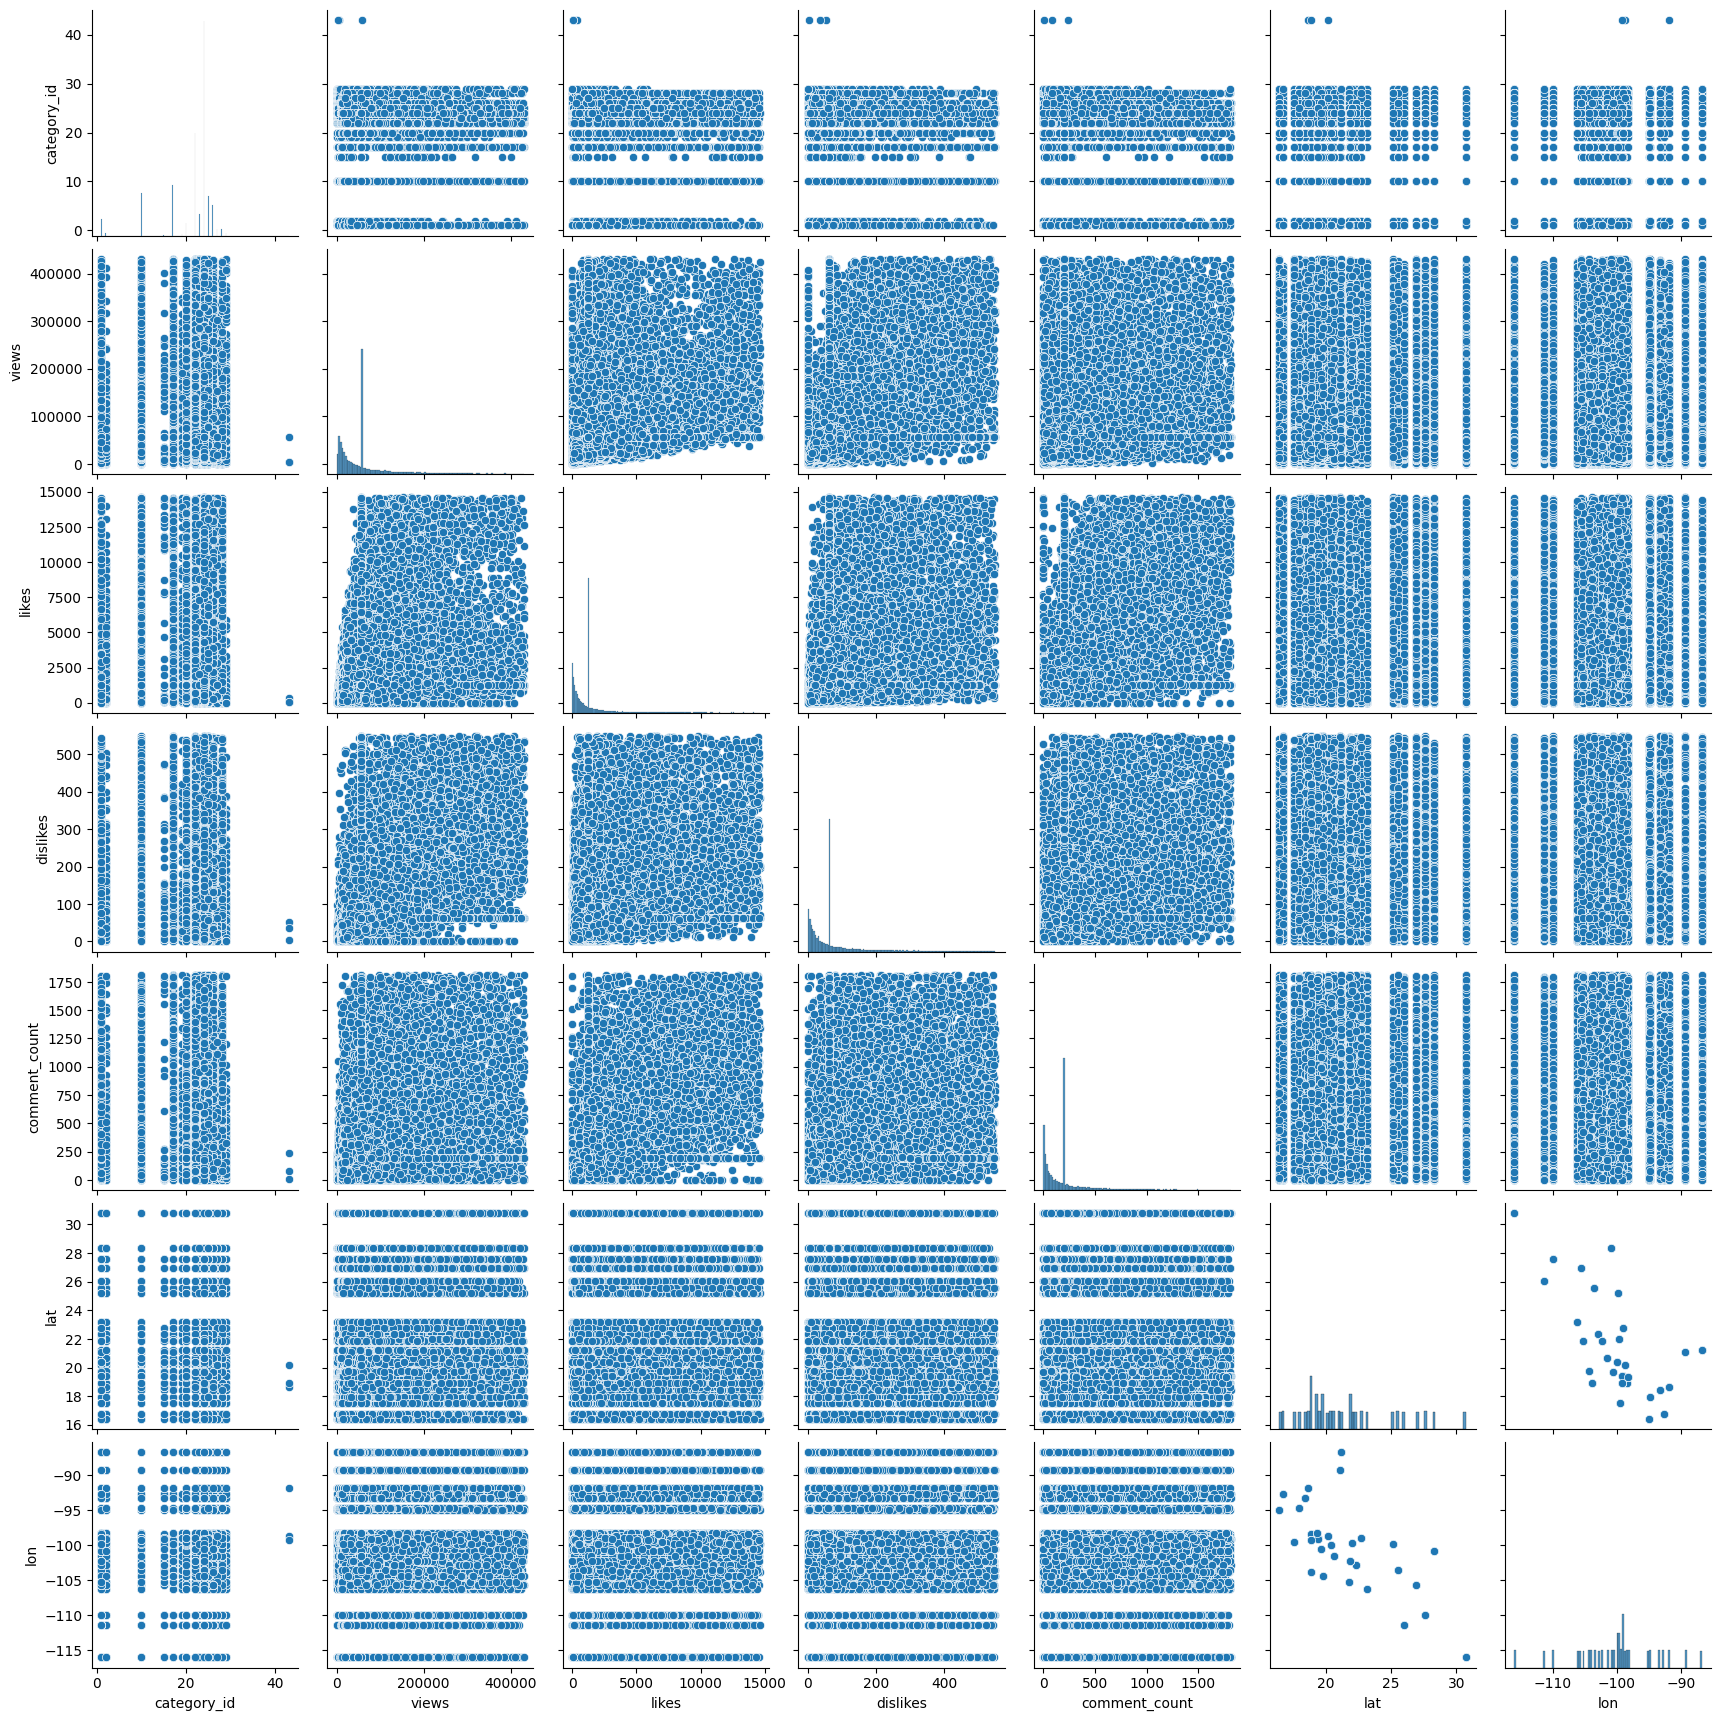

In [ ]:
sns.pairplot(df)

In [ ]:
# Abrir y leer el archivo JSON
with open('KR_category_id.json', 'r') as file:
    data = json.load(file)  # Cargar el contenido del archivo en un diccionario o lista de Python

# Mostrar el contenido
print(data)

{'kind': 'youtube#videoCategoryListResponse', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"', 'items': [{'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}, {'kind': 'yout

In [ ]:
dfjson = pd.DataFrame(data)
dfjson.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [ ]:
dfjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kind    31 non-null     object
 1   etag    31 non-null     object
 2   items   31 non-null     object
dtypes: object(3)
memory usage: 872.0+ bytes
